In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
TRAIN_DATA_PATH = '/home/valentine/Documents/GU_AI_396/03_Data Science Python libs: Numpy, Matplotlib, Scikit-learn/course project/data/train.csv'
TEST_DATA_PATH = '/home/valentine/Documents/GU_AI_396/03_Data Science Python libs: Numpy, Matplotlib, Scikit-learn/course project/data/test.csv'
PREPARED_DATASET_PATH = '/home/valentine/Documents/GU_AI_396/03_Data Science Python libs: Numpy, Matplotlib, Scikit-learn/course project/data/result.csv'

In [3]:
df_train = pd.read_csv(TRAIN_DATA_PATH, sep=',')

Обзор тренировочных данных

In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [6]:
df_train.select_dtypes(include=['object', 'bool'])

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B
...,...,...,...
9995,B,B,B
9996,B,B,A
9997,B,B,A
9998,B,A,B


In [7]:
df_train.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Приведение категориальных признаков

In [8]:
cat_map = {'A': 0, 'B': 1}
cats = df_train.select_dtypes(include=['object','bool']).columns

for i in cats:
    df_train[i] = df_train[i].map(cat_map)

Обработка выбросов

In [9]:
df_train.loc[df_train['Rooms'].isin([0, 10, 19]), 'Rooms'] = np.nan
df_train.loc[df_train['LifeSquare'] < 8, 'LifeSquare'] = 8
df_train.loc[df_train['HouseYear'] == 20052011, 'HouseYear'] = 2011
df_train.loc[df_train['HouseYear'] == 4968, 'HouseYear'] = 1968
df_train.loc[(df_train['HouseFloor']==0)|(df_train['HouseFloor'] < df_train['Floor']), 'HouseFloor'] = np.nan

Обработка пропусков

In [10]:
from sklearn.experimental import enable_iterative_imputer #noqa
from sklearn.impute import IterativeImputer

cols = df_train.columns

imputer = IterativeImputer(max_iter=100)
df_train = pd.DataFrame(imputer.fit_transform(df_train.select_dtypes(exclude='object')))
df_train.columns = cols

In [11]:
# df_train = pd.concat([df_train, pd.get_dummies(df_train['DistrictId'])], axis=1)

In [12]:
list_to_float32 = list(df_train.dtypes[df_train.dtypes=='float64'].index)
list_to_int32 = list(df_train.dtypes[df_train.dtypes=='int64'].index)

df_train[list_to_float32] = df_train[list_to_float32].astype('float32')
df_train[list_to_int32] = df_train[list_to_int32].astype('int32')

In [13]:
med_price_by_district = df_train.groupby(['DistrictId'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MedPriceByDistrict'})

df_train = df_train.merge(med_price_by_district, on=['DistrictId'], how='left')

# med_square_a_room = df_train['LifeSquare'] / df_train['Rooms']

# df_train.loc[df_train['Floor']==1, 'IsFirstFloor'] = 1
# df_train.loc[df_train['IsFirstFloor'].isnull(), 'IsFirstFloor'] = 0

# df_train['MedSquareARoom'] = med_square_a_room

# df_train.pop('Healthcare_1')
# df_train.pop('Social_3')

In [14]:
y = df_train.pop('Price')
X = df_train.iloc[:, 1:]

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
# parameters = {
#     'n_estimators': [150, 200, 250],
#     'max_features': np.arange(5, 12),
#     'max_depth': np.arange(5, 10),
# }

# model = RandomForestRegressor(random_state=21, n_jobs=-1, oob_score=True)

# rfrmodel = GridSearchCV(model, parameters, scoring='r2', n_jobs=-1, cv=3, verbose=1)
# rfrmodel.fit(X, y)

# rfrmodel.best_params_

In [17]:
rfrmodel = RandomForestRegressor(max_depth=9, max_features=10, n_estimators=250)

rfrmodel.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
feature_importances = pd.DataFrame(zip(X.columns, rfrmodel.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
2,Square,0.329505
18,MedPriceByDistrict,0.244908
1,Rooms,0.139770
12,Social_2,0.053408
11,Social_1,0.042504
3,LifeSquare,0.040651
13,Social_3,0.028347
4,KitchenSquare,0.024054
14,Healthcare_1,0.019653
6,HouseFloor,0.016350


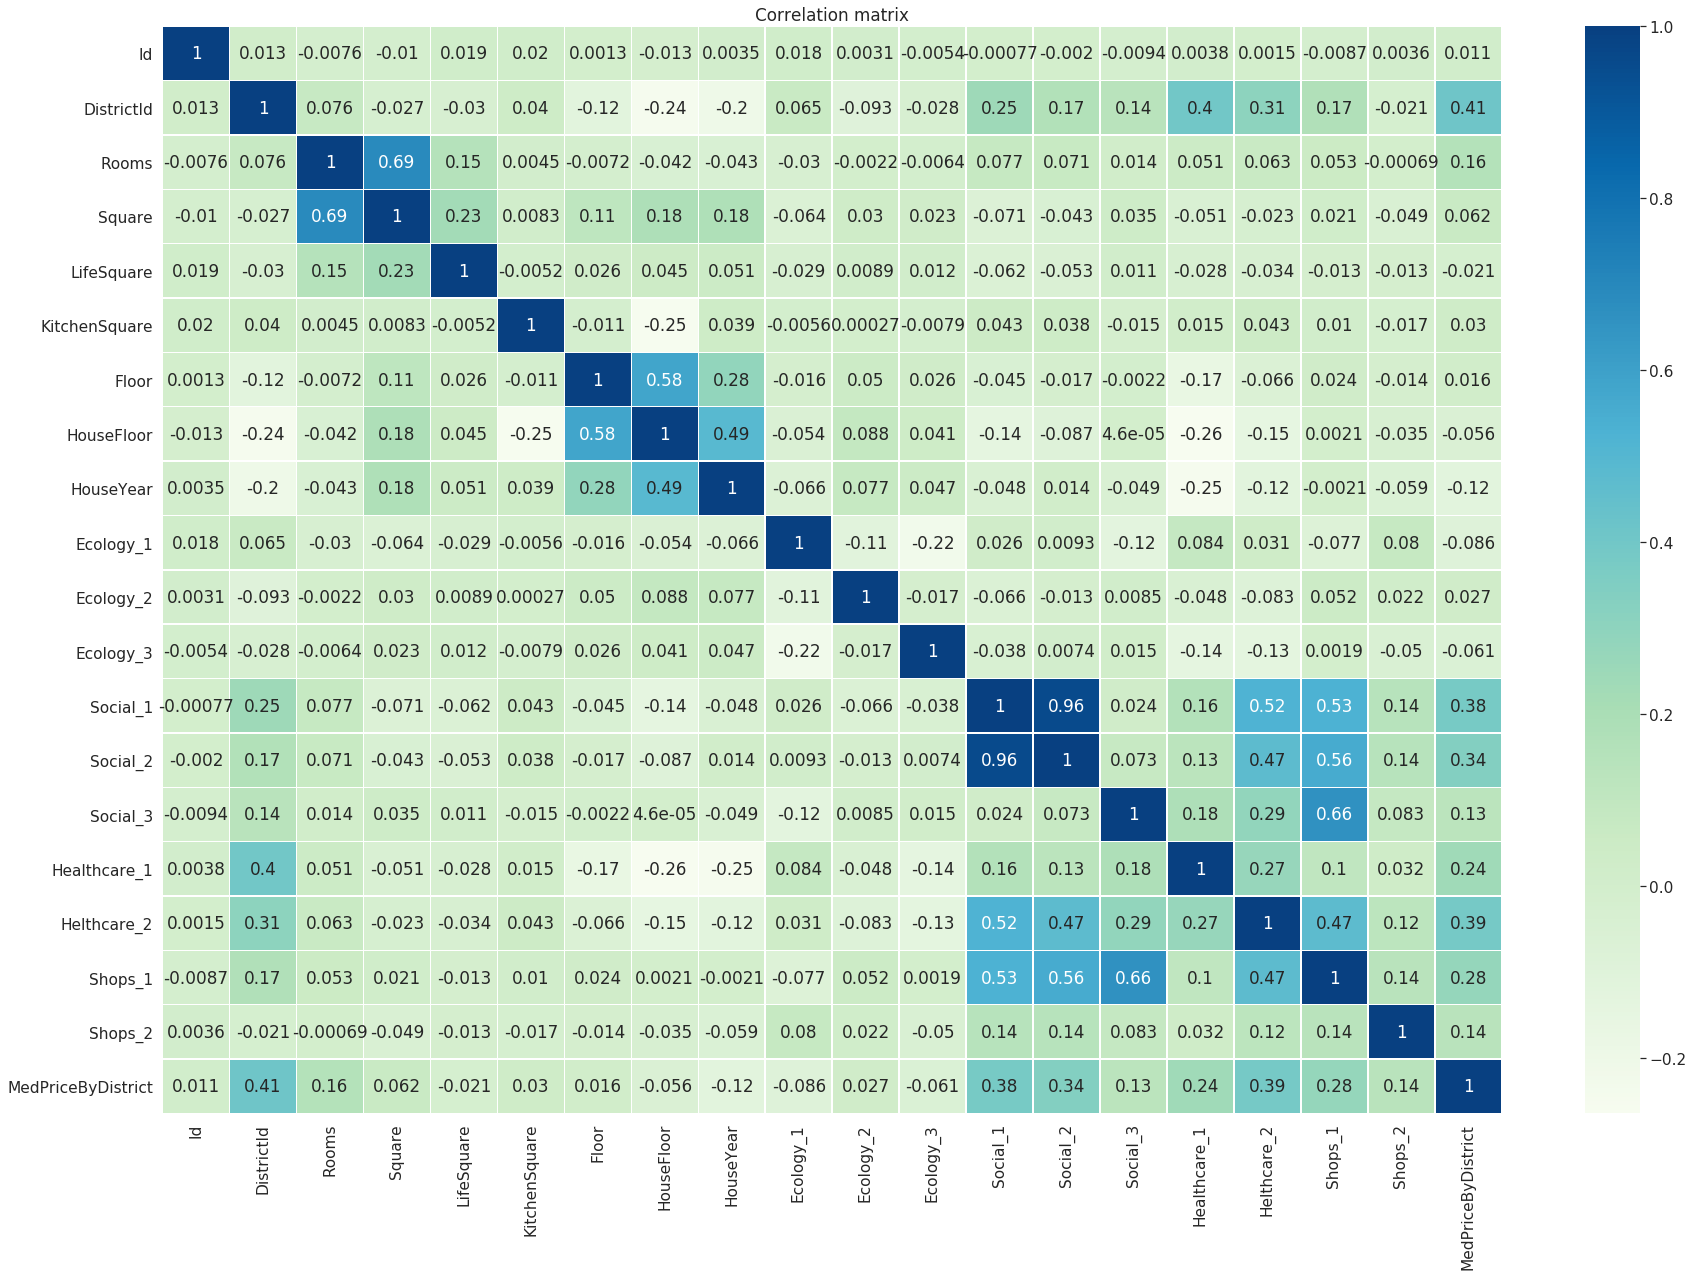

In [19]:
plt.figure(figsize = (30,20))

sns.set(font_scale=1.4)
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [20]:
cv_score = cross_val_score(rfrmodel, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=42))
print(cv_score)
print(cv_score.mean())

[0.72283224 0.74362654 0.74349402 0.74099676 0.78359417]
0.7469087466292377


In [21]:
df_test = pd.read_csv(TEST_DATA_PATH, sep=',')
df_test_ids = df_test['Id']

In [22]:
cat_map = {'A': 0, 'B': 1}
cats = df_test.select_dtypes(include=['object','bool']).columns

for i in cats:
    df_test[i] = df_test[i].map(cat_map)

df_test.loc[df_test['Rooms'].isin([0, 10, 19]), 'Rooms'] = np.nan
df_test.loc[df_test['LifeSquare'] < 8, 'LifeSquare'] = 8
df_test.loc[df_test['HouseYear'] > 2020, 'HouseYear'] = 2020
df_test.loc[(df_test['HouseFloor'] == 0)|(df_test['HouseFloor'] < df_test['Floor']), 'HouseFloor'] = np.nan

df_test = df_test.iloc[:, 1:]

cols = df_test.columns

imputer = IterativeImputer(max_iter=100)
df_test = pd.DataFrame(imputer.fit_transform(df_test.select_dtypes(exclude='object')))
df_test.columns = cols

df_test = df_test.merge(med_price_by_district, on=['DistrictId'], how='left')

df_test.loc[df_test['MedPriceByDistrict'].isnull()] = df_test['MedPriceByDistrict'].median()

In [23]:
y_pred_test = rfrmodel.predict(df_test)

In [24]:
kgres = pd.DataFrame({'Id': df_test_ids, 'Price': y_pred_test})

In [25]:
kgres.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')